<a href="https://colab.research.google.com/github/ViejoLoco27/Desafio1_Manipulacon_de_Datos/blob/main/Manipulaci%C3%B3n_Datos_Desaf%C3%ADo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Análisis de ventas**

El objetivo de este proyecto es analizar los resultados de un evento con los clientes de una empresa de venta online. Se recopiló un conjunto de datos que contiene los clientes que más gastaron en productos durante los 5 días de ventas, que es la duración del evento. **Este análisis identificará al cliente con la mayor compra esta semana, quien recibirá un premio de la tienda, y posteriormente, puede ayudar a la empresa a crear nuevas estrategias para atraer más clientes.**

## **Aula 1: Importando librerías y datos**




In [30]:
import pandas as pd
import numpy as np

In [2]:
datos_ventas=pd.read_json('/content/datos_ventas_clientes.json')
datos_ventas

,dados_vendas
0,"{'Data de venda': '06/06/2022', 'Cliente': ['@..."
1,"{'Data de venda': '07/06/2022', 'Cliente': ['I..."
2,"{'Data de venda': '08/06/2022', 'Cliente': ['I..."
3,"{'Data de venda': '09/06/2022', 'Cliente': ['J..."
4,"{'Data de venda': '10/06/2022', 'Cliente': ['M..."


# **Aula 2: Normalización y transformación de datos**
- Eliminar datos en listas dentro del DataFrame;
- Verificar tipos de datos;
- Identificar columnas numéricas;
- Transformar la columna numérica a tipo numérico.

## **Eliminar datos en listas dentro del DataFrame**

In [31]:
datos_ventas_normalize = pd.json_normalize(datos_ventas['dados_vendas'])
datos_ventas_normalize.head()

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


La normalización de datos se llevo a cabo con éxito; no obstante, las columnas siguen presentando listas

In [32]:
columnas  = list(datos_ventas_normalize.columns)
columnas

['Data de venda', 'Cliente', 'Valor da compra']

In [33]:
datos_ventas_normalize = datos_ventas_normalize.explode(columnas[1:])
datos_ventas_normalize

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
1,07/06/2022,Isabely JOanes 738,"R$ 825,31"
1,07/06/2022,Isabely JOanes 738,"R$ 168,07"
1,07/06/2022,Isabely JOanes 738,"R$ 339,18"
1,07/06/2022,Isabely JOanes 738,"R$ 314,69"
2,08/06/2022,Isabely JOanes 738,"R$ 682,05"
2,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [34]:
datos_ventas_normalize.reset_index(drop=True, inplace=True)
datos_ventas_normalize.head()


,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
1,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
2,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
3,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
4,07/06/2022,Isabely JOanes 738,"R$ 825,31"


## **Verificar tipo de datos**

In [35]:
datos_ventas_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data de venda    20 non-null     object
 1   Cliente          20 non-null     object
 2   Valor da compra  20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


## Limpieza de datos:
- Identificar columnas numéricas
- Transfromar la columna numérica a tipo numérico


In [37]:
datos_ventas_normalize['Valor da compra']=datos_ventas_normalize['Valor da compra'].apply(lambda x: x.replace('R$','').replace(',','.').strip())

In [40]:
datos_ventas_normalize.head(5)

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,836.5
1,06/06/2022,DieGO ARMANDIU 210,573.33
2,06/06/2022,DieGO ARMANDIU 210,392.8
3,06/06/2022,DieGO ARMANDIU 210,512.34
4,07/06/2022,Isabely JOanes 738,825.31


In [41]:
datos_ventas_normalize['Valor da compra']=datos_ventas_normalize['Valor da compra'].astype(np.float64)
datos_ventas_normalize.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data de venda    20 non-null     object 
 1   Cliente          20 non-null     object 
 2   Valor da compra  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


# **Aula 3: Tokenización de datos**

## **Objetivos:**
Debido a una inestabilidad en el sitio web de la empresa, tuvimos problemas con los nombres de los clientes durante el guardado. Esto resultó en una columna de nombres de clientes con una combinación de letras, mayúsculas y minúsculas, números y otros caracteres.

Sabiendo esto, manipula los textos de la columna Cliente para que el resultado sean los nombres de los clientes en letras minúsculas, con ausencia de caracteres especiales o números.

In [42]:
datos_ventas_normalize

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,836.50
1,06/06/2022,DieGO ARMANDIU 210,573.33
2,06/06/2022,DieGO ARMANDIU 210,392.80
3,06/06/2022,DieGO ARMANDIU 210,512.34
4,07/06/2022,Isabely JOanes 738,825.31
5,07/06/2022,Isabely JOanes 738,168.07
6,07/06/2022,Isabely JOanes 738,339.18
7,07/06/2022,Isabely JOanes 738,314.69
8,08/06/2022,Isabely JOanes 738,682.05
9,08/06/2022,JOãO Gabriel 671,386.34


In [43]:
datos_ventas_normalize['Cliente']=datos_ventas_normalize['Cliente'].str.lower()

In [44]:
datos_ventas_normalize.head()

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ana _lucia 321,836.50
1,06/06/2022,diego armandiu 210,573.33
2,06/06/2022,diego armandiu 210,392.80
3,06/06/2022,diego armandiu 210,512.34
4,07/06/2022,isabely joanes 738,825.31


In [45]:
datos_ventas_normalize['Cliente']=datos_ventas_normalize['Cliente'].str.replace('[^a-z ]', '', regex=True)

In [46]:
datos_ventas_normalize['Cliente']=datos_ventas_normalize['Cliente'].str.strip()

In [47]:
datos_ventas_normalize.head()

,Data de venda,Cliente,Valor da compra
0,06/06/2022,ana lucia,836.50
1,06/06/2022,diego armandiu,573.33
2,06/06/2022,diego armandiu,392.80
3,06/06/2022,diego armandiu,512.34
4,07/06/2022,isabely joanes,825.31


# **Aula 4: Datos de tiempo**

## **Objetivo:**
En la columna Fecha de venta tenemos fechas en el formato 'día/mes/año' (dd/mm/AAAA). Transforme estos datos al tipo datetime y busque una forma de visualización de subconjunto que pueda contribuir al objetivo del contexto en el que se insertan los datos.

Si no recuerdas el problema del Proyecto Desafío 1, te dejo el texto de la situación a continuación para que sea más fácil encontrar la información:

[...]**Este análisis identificará al cliente con la mayor compra esta semana, quien recibirá un premio de la tienda, y posteriormente, puede ayudar a la empresa a crear nuevas estrategias para atraer más clientes.**

In [17]:
# Transformar para el tipo datetime definiendo el formato de fecha como DD/MM/AAAA ('%d/%m/%Y')
datos_ventas_normalize['Data de venda'] = pd.to_datetime(datos_ventas_normalize['Data de venda'], format='%d/%m/%Y')


In [48]:
# Visualizar el resultado
datos_ventas_normalize.head()



,Data de venda,Cliente,Valor da compra
0,06/06/2022,ana lucia,836.50
1,06/06/2022,diego armandiu,573.33
2,06/06/2022,diego armandiu,392.80
3,06/06/2022,diego armandiu,512.34
4,07/06/2022,isabely joanes,825.31


In [19]:
# Verificar el resultado de la transformación
datos_ventas_normalize.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data de venda    20 non-null     datetime64[ns]
 1   Cliente          20 non-null     object        
 2   Valor da compra  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.0+ bytes


In [20]:
# Calcular el total recaudado en compras por cada cliente
total_compras = datos_ventas_normalize.groupby(['Cliente'])['Valor da compra'].sum()


In [21]:
# Visualizar el resultado
total_compras.sort_values(ascending=False)

,Valor da compra
Cliente,
isabely joanes,2329.30
maria julia,2086.65
julya meireles,1643.74
diego armandiu,1478.47
paulo castro,899.16
thiago fritzz,885.24
ana lucia,836.50
joo gabriel,386.34
pedro pasco,311.15


In [52]:
resultado = total_compras.sort_values(ascending=False)
resultado.info()

<class 'pandas.core.series.Series'>
Index: 9 entries, isabely joanes to pedro pasco
Series name: Valor da compra
Non-Null Count  Dtype  
--------------  -----  
9 non-null      float64
dtypes: float64(1)
memory usage: 144.0+ bytes


In [54]:
df = pd.DataFrame(resultado)
df


,Valor da compra
Cliente,
isabely joanes,2329.30
maria julia,2086.65
julya meireles,1643.74
diego armandiu,1478.47
paulo castro,899.16
thiago fritzz,885.24
ana lucia,836.50
joo gabriel,386.34
pedro pasco,311.15


<Axes: xlabel='Cliente', ylabel='Volúmen de compras'>

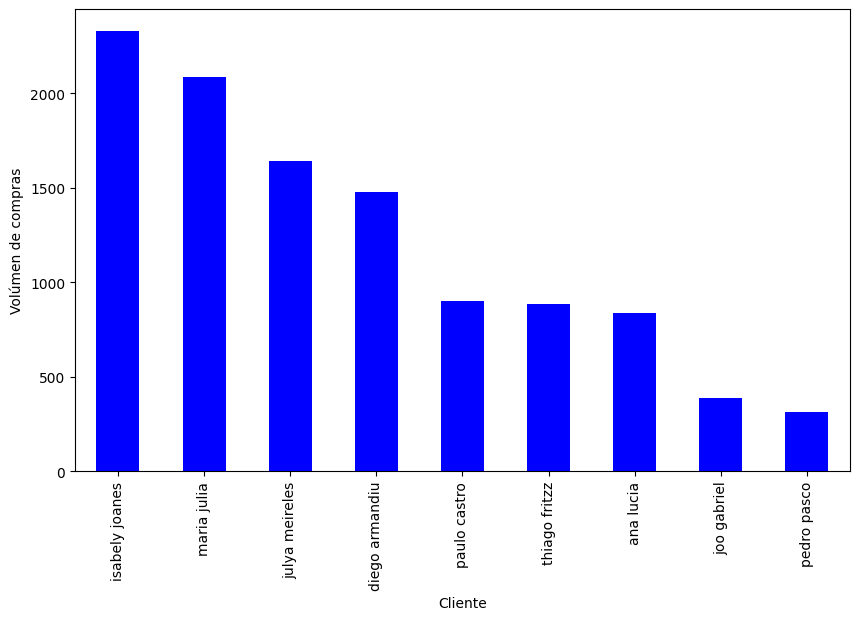

In [56]:
df.plot(kind='bar', xlabel='Cliente', ylabel='Volúmen de compras', figsize=(10, 6), color='blue', legend=False)